  <img src="https://raw.githubusercontent.com/scalabrinig/cdProjetoAplicadoIV/d093146488f56dfcf0ef286bcee8efe0e71b9c76/figuras/mackenzie_logo.jpg" width="25%" align="right"/>

# **PROJETO APLICADO IV - Ciência de Dados EaD - 2025/02**


# **Entrega 2**

---

# **Título do Projeto**

SÉRIE TEMPORAL: RELATÓRIO DE BILHETERIA DE OBRAS INFORMADAS PELAS EXIBIDORAS

In [2]:
#@title **Identificação do Grupo e Opção do Projeto**

#@markdown Integrantes do Grupo, nome completo em ordem alfabética (*informe: \<nome\>, \<matrícula\>*)
Aluno1 = 'NICOLAS DE SOUZA OCAMPOS, 10416091' #@param {type:"string"}
Aluno2 = 'ALANIS URQUISA DIAS MOREIRA, 10424448' #@param {type:"string"}
Aluno3 = 'MARIA EDUARDA DE LIMA, 10414867' #@param {type:"string"}
Aluno4 = 'MATHEUS PEREIRA FORTUNATO, 10424297' #@param {type:"string"}


# Imports das Bibliotecas

In [59]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import json
import seaborn as sns
import numpy as np
import os

# Introdução

Além de entreter, o cinema tem um papel importante na economia, na cultura e na vida das cidades. 
Quando pensamos no setor de exibição cinematográfica, estamos falando de geração de empregos, movimentação econômica, oferta de lazer e acesso à cultura. 
No entanto, ainda existem muitas diferenças no acesso a esses espaços entre diferentes regiões, e entender como o público se comporta ao longo do tempo pode ajudar a enfrentar esses desafios.

Este projeto nasce justamente da vontade de entender melhor essa realidade por meio de dados. 
A proposta é aplicar técnicas de análise de séries temporais, uma área da estatística que estuda padrões e tendências em dados que variam com o tempo. 
Usando informações sobre sessões de cinema no Brasil — como número de espectadores, localização das salas, dados sobre os filmes exibidos e as empresas responsáveis —, o projeto busca criar um modelo que ajude a visualizar como esse setor tem evoluído.

## Motivações e Justificativas
Apesar da sua importância, o setor de exibição cinematográfica ainda apresenta grandes desigualdades regionais, com acesso limitado em muitos municípios brasileiros, especialmente os mais afastados dos grandes centros urbanos.  

Com o avanço das tecnologias e a disponibilidade de dados públicos, surge a oportunidade de usar ferramentas de análise de dados para entender melhor o comportamento do público ao longo do tempo. 
Através da construção de séries temporais, é possível identificar tendências, sazonalidades, quedas e crescimentos no número de espectadores — informações essenciais para avaliar o desempenho do setor e orientar ações práticas.  

Essa análise é relevante não só para os gestores públicos, que podem usá-la para formular políticas culturais mais eficientes, mas também para empreendedores, produtores culturais e investidores. 
Além disso, os resultados contribuem diretamente para os Objetivos de Desenvolvimento Sustentável (ODS):  
- **ODS 8 (Trabalho Decente e Crescimento Econômico)**: ao mostrar como o setor gera renda e empregos formais.  
- **ODS 9 (Indústria, Inovação e Infraestrutura)**: ao mapear a presença e evolução das salas de cinema como infraestrutura cultural.  
- **ODS 11 (Cidades e Comunidades Sustentáveis)**: ao revelar onde há acesso (ou falta de acesso) a serviços culturais.  

Portanto, este projeto parte do entendimento de que dados bem analisados podem transformar o modo como se planeja e investe em cultura no Brasil. A proposta tem potencial de aplicabilidade em políticas públicas, iniciativas privadas e estudos acadêmicos, promovendo uma visão mais completa e estratégica do setor audiovisual.

## Objetivo

O principal objetivo deste projeto é construir um modelo de série temporal que permita analisar a evolução do setor de exibição cinematográfica no Brasil a partir de dados públicos, com foco em indicadores como número de espectadores, distribuição geográfica das salas de cinema, presença de filmes nacionais e quantidade de exibidoras ativas.

A partir desse modelo, buscamos:
-   Identificar padrões de comportamento do público (como períodos de alta ou baixa frequência);
-   Analisar tendências e sazonalidades no consumo de cinema ao longo dos anos;
-   Mapear a infraestrutura de exibição pelo território nacional, destacando possíveis desigualdades regionais;
- Avaliar a presença de obras nacionais, observando seu desempenho em comparação com produções estrangeiras;
-   Gerar indicadores e visualizações que apoiem políticas culturais e ações de incentivo à indústria audiovisual brasileira;
-   Contribuir para os ODS 8, 9 e 11, promovendo desenvolvimento sustentável por meio da cultura.

A meta final é transformar dados brutos em informações estratégicas que fortaleçam o setor, ampliem o acesso à cultura e incentivem a criação de políticas mais justas e eficazes para todos os brasileiros.


# Referencial Teórico

O referencial teórico deste trabalho está fundamentado na análise de **séries temporais**, que consiste em métodos estatísticos aplicados a dados que variam ao longo do tempo, permitindo identificar tendências, sazonalidades e padrões.  

Autores como Box e Jenkins (1976) foram pioneiros no desenvolvimento de modelos de séries temporais, como ARIMA, que permitem a previsão de valores futuros a partir de observações passadas.  
Além disso, trabalhos recentes aplicam Machine Learning para melhorar a acurácia de previsões nesse contexto, especialmente em setores como economia e cultura.  

No campo da economia criativa e audiovisual, a análise de séries temporais é usada para entender o comportamento de bilheterias, prever demanda e apoiar a formulação de políticas culturais.  
Estudos do IBGE (2020) e da ANCINE reforçam a importância de utilizar dados abertos para monitorar a evolução do setor.  

Entre as principais vantagens da análise temporal estão:  
- Identificação de padrões sazonais e de longo prazo.  
- Apoio à tomada de decisão baseada em dados reais.  

Como limitações, destacam-se a necessidade de séries históricas longas e consistentes, além da suscetibilidade a eventos externos inesperados (ex.: pandemia da COVID-19).  

Referências no corpo do texto (ABNT):
- BOX, G. E. P.; JENKINS, G. M. Time Series Analysis: Forecasting and Control. San Francisco: Holden-Day, 1976.  
- IBGE. País tem quase 40% da população em municípios sem salas de cinema. Agência de Notícias IBGE, 2020.  
- ANCINE; PORTAL BRASILEIRO DE DADOS ABERTOS. Relatório de bilheteria diária de obras informadas pelas exibidoras, 2025.  


# Pipeline da Solução

A proposta de pipeline da solução é estruturada em etapas:  

1. **Coleta de Dados**  
   - Obtenção dos registros da ANCINE disponibilizados no Portal Brasileiro de Dados Abertos.  

2. **Pré-processamento**  
   - Tratamento de dados faltantes, padronização de datas, limpeza de outliers e conversão para formatos adequados (CSV/JSON).  

3. **Exploração dos Dados (EDA)**  
   - Análises descritivas, estatísticas básicas e visualizações iniciais (distribuição de público, regionalidade, filmes nacionais vs. estrangeiros).  

4. **Modelagem de Séries Temporais**  
   - Aplicação de modelos ARIMA, SARIMA e comparações com métodos de aprendizado de máquina (Ex.: LSTM).  

5. **Avaliação**  
   - Métricas como RMSE, MAPE e comparações visuais entre valores previstos e reais.  

6. **Visualização dos Resultados**  
   - Gráficos interativos e dashboards que facilitem a interpretação dos padrões e previsões.  

7. **Conclusões e Aplicações**  
   - Geração de insights para políticas públicas e estratégias privadas no setor audiovisual.  


# Descrição da Base de Dados

A base de dados utilizada neste projeto é disponibilizada pelo Portal Brasileiro de Dados Abertos, organizada pela Agência Nacional do Cinema (ANCINE), sob o título [“Relatório de bilheteria diária de obras informadas pelas exibidoras”](https://dados.gov.br/dados/conjuntos-dados/relatorio-de-bilheteria-diaria-de-obras-informadas-pelas-exibidoras). Esse conjunto reúne informações fornecidas diretamente pelas empresas exibidoras e atualizadas de forma contínua na plataforma oficial de dados abertos do governo.

O dataset contém registros diários de bilheteria das salas de cinema no Brasil, abrangendo o período de junho de 2014 até o presente momento (neste trabalho, até 15 de setembro de 2025). A base é atualizada diariamente, garantindo que os dados reflitam a dinâmica mais recente do setor.

O dataset apresenta a seguinte estrutura:
-   Data da Exibição: data em que a sessão ocorreu.
-   Sessão: identificação específica da sessão.
-   Título original da obra: nome original do filme.
-   Título no Brasil: título utilizado para exibição no mercado brasileiro.
-   CPB/ROE: código que identifica a obra (como Classificação de Produto Brasileiro / Registro de Obras Exibidas).
-   Áudio: tipo de áudio da exibição (por exemplo, original, dublado).
-   Legenda: tipo de legenda presente (se aplicável).
-   País: país de origem da obra.
-   Registro Sala: código identificador da sala de exibição.
-   Nome Sala: nome atribuído à sala específica.
-   Público: número de espectadores da sessão.
-   Registro do Grupo Exibidor: código do grupo de exibidor responsável.
-   Registro Exibidor: identificador da empresa exibidora.
-   Registro do Complexo: identificador do complexo (conjunto de salas).
-   Município Sala/Complexo: cidade onde a sala ou complexo está localizado.
-   UF Sala/Complexo: unidade federativa (estado) da sala ou complexo.
-   Razão Social Exibidora: razão social da empresa que exibe o filme.
-   CNPJ da Exibidora: número cadastrado da empresa exibidora.

Os dados são disponibilizados em arquivos organizados por mês e ano, nos seguintes formatos: CSV, JSON, ODT e XML, o que permite diferentes formas de processamento e análise.

### Carregamento dos Dados

O Portal Brasileiro de Dados Abertos disponibiliza os registros em vários arquivos separados por data. Para simplificar a análise exploratória, o primeiro passo é consolidar esses arquivos em um único arquivo .csv, reunindo todas as informações em uma base integrada.

In [6]:
# Caminho da pasta onde estão os arquivos
pasta = "bilheteria-diaria-obras-por-exibidoras-csv"

# Lista todos os arquivos .csv na pasta
arquivos = [f for f in os.listdir(pasta) if f.endswith(".csv")]

# Lê e concatena todos os CSVs
dataframes = []
for arquivo in arquivos:
    caminho = os.path.join(pasta, arquivo)
    df = pd.read_csv(caminho, sep=";")
    dataframes.append(df)

# Junta tudo em um único DataFrame
df_final = pd.concat(dataframes, ignore_index=True)
df_final.to_csv("bilheteria_unificado.csv", index=False)

print("Arquivos unidos com sucesso! Total de linhas:", len(df_final))

Arquivos unidos com sucesso! Total de linhas: 33511860


### Exploração inicial do Dataset

Após carregar e consolidar os dados, realizamos alguns passos para conhecer melhor a base:

-   df_final.columns: lista o nome de todas as colunas disponíveis no dataset.

In [7]:
df_final.columns

Index(['DATA_EXIBICAO', 'SESSAO', 'TITULO_ORIGINAL', 'TITULO_BRASIL',
       'CPB_ROE', 'AUDIO', 'LEGENDADA', 'PAIS_OBRA', 'REGISTRO_SALA',
       'NOME_SALA', 'PUBLICO', 'REGISTRO_GRUPO_EXIBIDOR', 'REGISTRO_EXIBIDOR',
       'REGISTRO_COMPLEXO', 'MUNICIPIO_SALA_COMPLEXO', 'UF_SALA_COMPLEXO',
       'RAZAO_SOCIAL_EXIBIDORA', 'CNPJ_EXIBIDORA'],
      dtype='object')

-   df_final.info(): apresenta uma visão geral da estrutura do dataset, incluindo o número de linhas, colunas, tipos de dados e a presença de valores nulos. No resultado abaixo, observamos que a maioria das colunas está classificada como object. Esse tipo de representação pode não ser o mais adequado para todas as variáveis — por exemplo, colunas que representam datas ou identificadores numéricos podem ser convertidas para tipos mais apropriados. Esse ajuste será realizado na etapa de limpeza e preparação dos dados, garantindo que cada campo tenha o tipo correto e facilitando análises posteriores.

In [8]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33511860 entries, 0 to 33511859
Data columns (total 18 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   DATA_EXIBICAO            object 
 1   SESSAO                   object 
 2   TITULO_ORIGINAL          object 
 3   TITULO_BRASIL            object 
 4   CPB_ROE                  object 
 5   AUDIO                    object 
 6   LEGENDADA                object 
 7   PAIS_OBRA                object 
 8   REGISTRO_SALA            int64  
 9   NOME_SALA                object 
 10  PUBLICO                  int64  
 11  REGISTRO_GRUPO_EXIBIDOR  float64
 12  REGISTRO_EXIBIDOR        int64  
 13  REGISTRO_COMPLEXO        int64  
 14  MUNICIPIO_SALA_COMPLEXO  object 
 15  UF_SALA_COMPLEXO         object 
 16  RAZAO_SOCIAL_EXIBIDORA   object 
 17  CNPJ_EXIBIDORA           object 
dtypes: float64(1), int64(4), object(13)
memory usage: 4.5+ GB


-   df_final.describe(): apresenta estatísticas descritivas das colunas numéricas, como média, mínimo, máximo e quartis, ajudando a identificar padrões iniciais e possíveis outliers. 

**Observações importantes**

-   As colunas REGISTRO_SALA, REGISTRO_GRUPO_EXIBIDOR, REGISTRO_EXIBIDOR, REGISTRO_COMPLEXO não devem ser analisadas como variáveis numéricas no sentido estatístico (média, desvio padrão, etc.), pois são identificadores.

-   A coluna que de fato representa um valor quantitativo para análise é PUBLICO, que representa o número de espectadores por sessão. Temos um mínimo de 0 (sessões sem público), média de 32 pessoas por sessão, e máximo de 1.242 pessoas em uma única sessão. A distribuição é assimétrica, com muitas sessões pequenas e algumas com público muito alto.


In [9]:
df_final.describe()

,REGISTRO_SALA,PUBLICO,REGISTRO_GRUPO_EXIBIDOR,REGISTRO_EXIBIDOR,REGISTRO_COMPLEXO
count,3.351186e+07,3.351186e+07,3.165604e+07,3.351186e+07,3.351186e+07
mean,5.003628e+06,3.263407e+01,6.000032e+06,1.074339e+04,2.143870e+04
std,2.037338e+03,4.213848e+01,2.653341e+01,1.215983e+04,1.440478e+04
min,5.000056e+06,0.000000e+00,6.000000e+06,2.600000e+02,4.360000e+02
25%,5.001931e+06,7.000000e+00,6.000018e+06,1.843000e+03,6.634000e+03
50%,5.003804e+06,1.700000e+01,6.000024e+06,3.103000e+03,2.254800e+04
75%,5.005342e+06,4.100000e+01,6.000037e+06,1.726600e+04,3.073300e+04
max,5.007355e+06,1.242000e+03,6.000205e+06,6.263800e+04,6.303400e+04


-   df_final.head(10): exibe as 10 primeiras linhas, permitindo visualizar amostras iniciais dos registros.

In [12]:
df_final.head(10)

,DATA_EXIBICAO,SESSAO,TITULO_ORIGINAL,TITULO_BRASIL,CPB_ROE,AUDIO,LEGENDADA,PAIS_OBRA,REGISTRO_SALA,NOME_SALA,PUBLICO,REGISTRO_GRUPO_EXIBIDOR,REGISTRO_EXIBIDOR,REGISTRO_COMPLEXO,MUNICIPIO_SALA_COMPLEXO,UF_SALA_COMPLEXO,RAZAO_SOCIAL_EXIBIDORA,CNPJ_EXIBIDORA
0,2022-11-22,22/11/2022 04:45:00,BLACK PANTHER: WAKANDA FOREVER,PANTERA NEGRA: WAKANDA PARA SEMPRE,E2200378300000,DUBLADO,NÃO,ESTADOS UNIDOS,5005785,MOVIEPLEX - SALA 02,10,NaN,36106,36107,TIANGUÁ,CE,MOVIEPLEX ENTRETENIMENTO LTDA -ME,26.756.579/0001-00
1,2022-11-22,22/11/2022 05:20:00,BLACK PANTHER: WAKANDA FOREVER,PANTERA NEGRA: WAKANDA PARA SEMPRE,E2200378300000,DUBLADO,NÃO,ESTADOS UNIDOS,5005784,MOVIEPLEX - SALA 01,7,NaN,36106,36107,TIANGUÁ,CE,MOVIEPLEX ENTRETENIMENTO LTDA -ME,26.756.579/0001-00
2,2022-11-22,22/11/2022 06:00:00,BLACK ADAM,ADÃO NEGRO,E2200308100000,DUBLADO,NÃO,ESTADOS UNIDOS,5006082,CINE IMPERIAL 02,3,NaN,40730,40731,SALVADOR,BA,RG PALMA EXIBICAO CINEMATOGRAFICA LTDA,31.159.134/0001-83
3,2022-11-22,22/11/2022 08:00:00,BLACK PANTHER: WAKANDA FOREVER,PANTERA NEGRA: WAKANDA PARA SEMPRE,E2200378300000,DUBLADO,NÃO,ESTADOS UNIDOS,5005785,MOVIEPLEX - SALA 02,12,NaN,36106,36107,TIANGUÁ,CE,MOVIEPLEX ENTRETENIMENTO LTDA -ME,26.756.579/0001-00
4,2022-11-22,22/11/2022 08:00:00,ENCANTO,ENCANTO,E2100480200000,DUBLADO,NÃO,ESTADOS UNIDOS,5005641,CINESYSTEM PAULISTA SALA 02,105,6000027.0,22546,33152,PAULISTA,PE,REDECINE BRA CINEMATOGRÁFICA S.A.,15.422.993/0001-67
5,2022-11-22,22/11/2022 08:00:00,"LYLE, LYLE, CROCODILE","LILO, LILO, CROCODILO",E2200256400000,DUBLADO,NÃO,ESTADOS UNIDOS,5006421,GRUPOCINE ITAPECERICA 01,0,6000034.0,44276,44290,ITAPECERICA DA SERRA,SP,EMPRESA CINEMATOGRAFICA BOMBOCINE LTDA,21.298.337/0001-05
6,2022-11-22,22/11/2022 08:30:00,BLACK PANTHER: WAKANDA FOREVER,PANTERA NEGRA: WAKANDA PARA SEMPRE,E2200378300000,DUBLADO,NÃO,ESTADOS UNIDOS,5005784,MOVIEPLEX - SALA 01,16,NaN,36106,36107,TIANGUÁ,CE,MOVIEPLEX ENTRETENIMENTO LTDA -ME,26.756.579/0001-00
7,2022-11-22,22/11/2022 08:30:00,"LYLE, LYLE, CROCODILE","LILO, LILO, CROCODILO",E2200256400000,DUBLADO,NÃO,ESTADOS UNIDOS,5005808,CINEFLIX APARECIDA DE GOIANIA - SALA 4,17,6000014.0,24534,36838,APARECIDA DE GOIÂNIA,GO,REDECINE BSB CINEMATOGRÁFICA LTDA,18.087.870/0001-05
8,2022-11-22,22/11/2022 08:30:00,SING 2,SING 2,E2100492600000,DUBLADO,NÃO,ESTADOS UNIDOS,5003571,SALA CIDADE JARDIM NORTE 02,0,6000006.0,2836,22580,SÃO JOSÉ DO RIO PRETO,SP,EMPRESA SAO LUIZ DE CINEMAS LTDA - EM RECUPERA...,52.067.071/0001-05
9,2022-11-22,22/11/2022 09:00:00,BLACK PANTHER: WAKANDA FOREVER,PANTERA NEGRA: WAKANDA PARA SEMPRE,E2200378300000,DUBLADO,NÃO,ESTADOS UNIDOS,5006511,CINEMARK ITABUNA 03,145,6000018.0,1843,44890,ITABUNA,BA,CINEMARK BRASIL S.A,00.779.721/0001-41


-   df_final.isnull().sum(): mostra a quantidade de valores ausentes em cada coluna, útil para avaliar a necessidade de tratamento de dados faltantes. 

Abaixo podemos ver que:

-   TITULO_ORIGINAL (263 nulos) → valor pequeno em relação ao dataset (~33 milhões de linhas). Pode ser preenchido com TITULO_BRASIL quando disponível ou deixado em branco.

-   TITULO_BRASIL (≈ 4,5 milhões de nulos) → um volume grande. Isso sugere que em várias sessões só temos o título original cadastrado. Aqui pode fazer sentido manter apenas o título original como referência principal.

-   PAIS_OBRA (≈ 179 mil nulos) → relativamente pequeno, mas pode afetar análises de origem das obras. Talvez seja necessário cruzar com outra base ou preencher com “Não informado”.

-   REGISTRO_GRUPO_EXIBIDOR (≈ 1,8 milhão de nulos) → representa os exibidores que não fazem parte de um grupo (independentes). Pode ser interessante tratar como categoria própria, por exemplo "Sem Grupo".


In [ ]:
df_final.isnull().sum()

DATA_EXIBICAO                    0
SESSAO                           0
TITULO_ORIGINAL                263
TITULO_BRASIL              4557074
CPB_ROE                          0
AUDIO                            0
LEGENDADA                        0
PAIS_OBRA                   179045
REGISTRO_SALA                    0
NOME_SALA                        0
PUBLICO                          0
REGISTRO_GRUPO_EXIBIDOR    1855821
REGISTRO_EXIBIDOR                0
REGISTRO_COMPLEXO                0
MUNICIPIO_SALA_COMPLEXO          0
UF_SALA_COMPLEXO                 0
RAZAO_SOCIAL_EXIBIDORA           0
CNPJ_EXIBIDORA                   0
dtype: int64

-   df_final.shape: informa a dimensão da tabela (número de linhas e colunas). No exemplo, formatamos o resultado para exibir de forma clara:

In [14]:
print(f"A tabela possui {df_final.shape[0]} linhas e {df_final.shape[1]} colunas.")

A tabela possui 33511860 linhas e 18 colunas.


Com base nessa exploração inicial do dataset, já é possível avançar para a etapa de limpeza e ajustes, tratando os valores ausentes, corrigindo tipos de dados e padronizando as informações para garantir maior consistência nas análises.

### Limpeza e Ajustes de Dados

1. Conversão de tipos de dados: Primeiro, ajustamos as colunas para tipos adequados, garantindo que datas e identificadores sejam tratados corretamente.

In [ ]:
# Converter DATA_EXIBICAO para datetime
df_final["DATA_EXIBICAO"] = pd.to_datetime(df_final["DATA_EXIBICAO"], errors="coerce")

In [ ]:
# Identificadores como string (para não tratar estatisticamente)
id_cols = ["REGISTRO_SALA", "REGISTRO_GRUPO_EXIBIDOR", 
           "REGISTRO_EXIBIDOR", "REGISTRO_COMPLEXO", "CNPJ_EXIBIDORA"]

for col in id_cols:
    df_final[col] = df_final[col].astype("string")

In [22]:
# Colunas de texto com poucos valores únicos -> category
category_cols = ["SESSAO", "CPB_ROE", "AUDIO", "LEGENDADA", 
                 "PAIS_OBRA", "NOME_SALA", "MUNICIPIO_SALA_COMPLEXO", 
                 "UF_SALA_COMPLEXO", "RAZAO_SOCIAL_EXIBIDORA"]
for col in category_cols:
    df_final[col] = df_final[col].astype("category")

In [23]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33511860 entries, 0 to 33511859
Data columns (total 18 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   DATA_EXIBICAO            datetime64[ns]
 1   SESSAO                   category      
 2   TITULO_ORIGINAL          object        
 3   TITULO_BRASIL            object        
 4   CPB_ROE                  category      
 5   AUDIO                    category      
 6   LEGENDADA                category      
 7   PAIS_OBRA                category      
 8   REGISTRO_SALA            string        
 9   NOME_SALA                category      
 10  PUBLICO                  int64         
 11  REGISTRO_GRUPO_EXIBIDOR  string        
 12  REGISTRO_EXIBIDOR        string        
 13  REGISTRO_COMPLEXO        string        
 14  MUNICIPIO_SALA_COMPLEXO  category      
 15  UF_SALA_COMPLEXO         category      
 16  RAZAO_SOCIAL_EXIBIDORA   category      
 17  CNPJ_EXIBIDORA           

2. Tratamento de valores ausentes: Agora, vamos lidar com os nulos identificados na exploração inicial:

In [25]:
# Preencher TITULO_BRASIL com TITULO_ORIGINAL quando ausente
df_final["TITULO_BRASIL"] = df_final["TITULO_BRASIL"].fillna(df_final["TITULO_ORIGINAL"])

# Adicionar a categoria "Não informado" antes de preencher
df_final["PAIS_OBRA"] = df_final["PAIS_OBRA"].cat.add_categories("Não informado")

# Agora preencher os valores ausentes
df_final["PAIS_OBRA"] = df_final["PAIS_OBRA"].fillna("Não informado")

# Preencher REGISTRO_GRUPO_EXIBIDOR ausente com "Sem Grupo"
df_final["REGISTRO_GRUPO_EXIBIDOR"] = df_final["REGISTRO_GRUPO_EXIBIDOR"].replace("nan", "Sem Grupo")


## Análise Exploratória

A análise exploratória será o primeiro passo para construir modelos de séries temporais, permitindo identificar padrões sazonais, tendências e mudanças no comportamento do público, além de mapear a infraestrutura de cinema no país. O objetivo desta análise exploratória é entender melhor o comportamento da bilheteria diária de obras exibidas no Brasil.

### Perguntas que iremos direcionar a análise

1. **Comportamento do Público**

-   Quais são os padrões de frequência do público ao longo do ano? Há períodos de alta ou baixa demanda?

    -   Existem padrões sazonais claros no número de espectadores? Quais meses (como férias de janeiro, julho e dezembro) ou dias da semana concentram o maior PUBLICO?
    -   Qual a relação entre o horário da SESSAO e o tamanho do PUBLICO? Sessões noturnas são consistentemente mais populares que as vespertinas?
    -   Qual a tendência do número de espectadores (PUBLICO) ao longo do tempo? Estamos observando um crescimento, uma queda ou uma estagnação do mercado de cinema no Brasil?

--------------------------------------------------------------------------------------------
Existem padrões sazonais claros no número de espectadores? Quais meses (como férias de janeiro, julho e dezembro) ou dias da semana concentram o maior PUBLICO?
--------------------------------------------------------------------------------------------


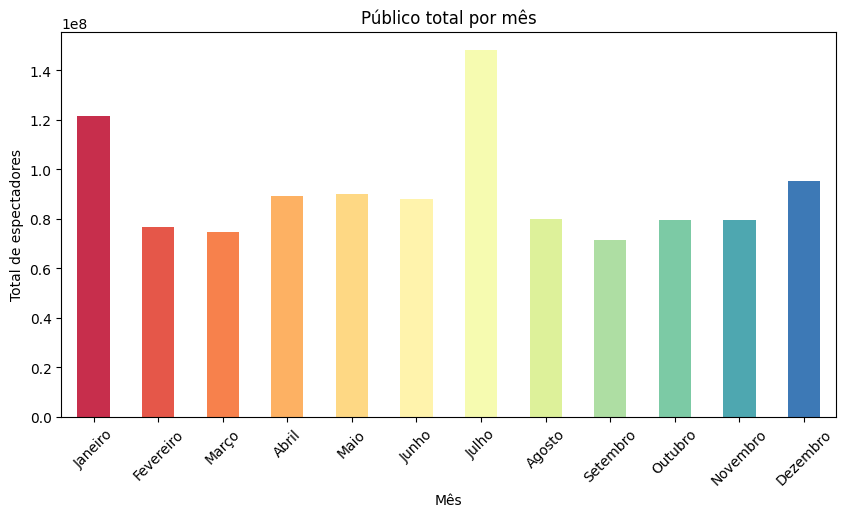

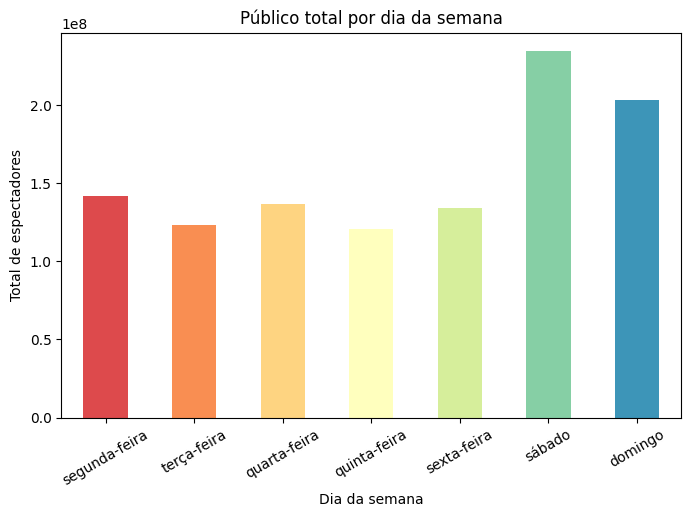

Mês com maior público: Julho → 148043551 espectadores
Mês com menor público: Setembro → 71246360 espectadores
Dia da semana com maior público: sábado → 234488607 espectadores
Dia da semana com menor público: quinta-feira → 120800764 espectadores


In [47]:
print("--------------------------------------------------------------------------------------------")
print("Existem padrões sazonais claros no número de espectadores? Quais meses (como férias de janeiro, julho e dezembro) ou dias da semana concentram o maior PUBLICO?")
print("--------------------------------------------------------------------------------------------")


# Garantir que a coluna de datas está no formato datetime
df_final['DATA_EXIBICAO'] = pd.to_datetime(df_final['DATA_EXIBICAO'], errors='coerce')

# Extrair mês e dia da semana
df_final['MES'] = df_final['DATA_EXIBICAO'].dt.month

# Traduzir dias da semana manualmente
dias_map = {
    "Monday": "segunda-feira",
    "Tuesday": "terça-feira",
    "Wednesday": "quarta-feira",
    "Thursday": "quinta-feira",
    "Friday": "sexta-feira",
    "Saturday": "sábado",
    "Sunday": "domingo"
}
df_final['DIA_SEMANA'] = df_final['DATA_EXIBICAO'].dt.day_name().map(dias_map)

# Traduzir meses manualmente
meses_map = {
    1: "Janeiro", 2: "Fevereiro", 3: "Março", 4: "Abril",
    5: "Maio", 6: "Junho", 7: "Julho", 8: "Agosto",
    9: "Setembro", 10: "Outubro", 11: "Novembro", 12: "Dezembro"
}
df_final['MES_NOME'] = df_final['MES'].map(meses_map)

# Agrupar público por mês (já com nome do mês)
publico_mes = df_final.groupby('MES_NOME')['PUBLICO'].sum()

# Reordenar meses para ficar na ordem correta
ordem_meses = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", 
               "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"]
publico_mes = publico_mes.reindex(ordem_meses)

# Agrupar público por dia da semana
publico_dia = df_final.groupby('DIA_SEMANA')['PUBLICO'].sum()

# Reordenar dias da semana
ordem_dias = ['segunda-feira', 'terça-feira', 'quarta-feira', 
              'quinta-feira', 'sexta-feira', 'sábado', 'domingo']
publico_dia = publico_dia.reindex(ordem_dias)

colors_mes = sns.color_palette("Spectral", n_colors=len(publico_mes))
colors_dia = sns.color_palette("Spectral", n_colors=len(publico_dia))

# ---- Visualizações ----
# Público por mês
plt.figure(figsize=(10,5))
publico_mes.plot(kind='bar', color=colors_mes)
plt.title("Público total por mês")
plt.xlabel("Mês")
plt.ylabel("Total de espectadores")
plt.xticks(rotation=45)
plt.show()

# Público por dia da semana
plt.figure(figsize=(8,5))
publico_dia.plot(kind='bar', color=colors_dia)
plt.title("Público total por dia da semana")
plt.xlabel("Dia da semana")
plt.ylabel("Total de espectadores")
plt.xticks(rotation=30)
plt.show()

# ---- Resultados textuais ----
print("Mês com maior público:", publico_mes.idxmax(), "→", publico_mes.max(), "espectadores")
print("Mês com menor público:", publico_mes.idxmin(), "→", publico_mes.min(), "espectadores")

print("Dia da semana com maior público:", publico_dia.idxmax(), "→", publico_dia.max(), "espectadores")
print("Dia da semana com menor público:", publico_dia.idxmin(), "→", publico_dia.min(), "espectadores")

--------------------------------------------------------------------------------------------
 Qual a relação entre o horário da SESSAO e o tamanho do PUBLICO? Sessões noturnas são consistentemente mais populares que as vespertinas?
--------------------------------------------------------------------------------------------


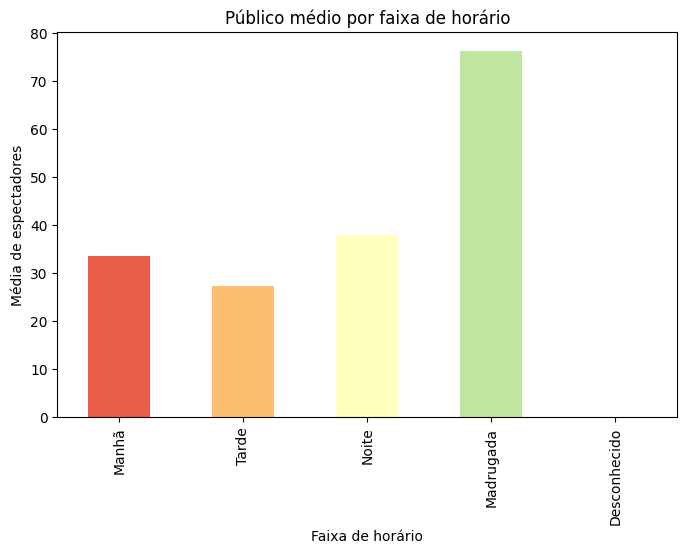

Público médio por faixa de horário:
 FAIXA_HORARIO
Manhã           33.557438
Tarde           27.244138
Noite           37.977818
Madrugada       76.330622
Desconhecido          NaN
Name: PUBLICO, dtype: float64

Faixa com maior público médio: Madrugada → 76.3306218758732 espectadores
Faixa com menor público médio: Tarde → 27.244138162473675 espectadores


In [46]:
print("--------------------------------------------------------------------------------------------")
print(" Qual a relação entre o horário da SESSAO e o tamanho do PUBLICO? Sessões noturnas são consistentemente mais populares que as vespertinas?")
print("--------------------------------------------------------------------------------------------")

# Garantir que SESSAO está no formato datetime
df_final['SESSAO'] = pd.to_datetime(df_final['SESSAO'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

# Extrair a hora da sessão
df_final['HORA'] = df_final['SESSAO'].dt.hour

# Criar faixas de horário
def faixa_horario(h):
    if pd.isna(h):
        return "Desconhecido"
    elif 6 <= h < 12:
        return "Manhã"
    elif 12 <= h < 18:
        return "Tarde"
    elif 18 <= h <= 23:
        return "Noite"
    else:
        return "Madrugada"

df_final['FAIXA_HORARIO'] = df_final['HORA'].apply(faixa_horario)

# Agrupar público médio por faixa de horário
publico_por_faixa = df_final.groupby('FAIXA_HORARIO')['PUBLICO'].mean().reindex(['Manhã', 'Tarde', 'Noite', 'Madrugada', 'Desconhecido'])

# ---- Visualização ----
colors = sns.color_palette("Spectral", n_colors=len(publico_por_faixa))

plt.figure(figsize=(8,5))
publico_por_faixa.plot(kind='bar', color=colors)
plt.title("Público médio por faixa de horário")
plt.xlabel("Faixa de horário")
plt.ylabel("Média de espectadores")
plt.show()

# ---- Resultados textuais ----
print("Público médio por faixa de horário:\n", publico_por_faixa)
print("\nFaixa com maior público médio:", publico_por_faixa.idxmax(), "→", publico_por_faixa.max(), "espectadores")
print("Faixa com menor público médio:", publico_por_faixa.idxmin(), "→", publico_por_faixa.min(), "espectadores")


--------------------------------------------------------------------------------------------
Qual a tendência do número de espectadores (PUBLICO) ao longo do tempo? Estamos observando um crescimento, uma queda ou uma estagnação do mercado de cinema no Brasil?
--------------------------------------------------------------------------------------------


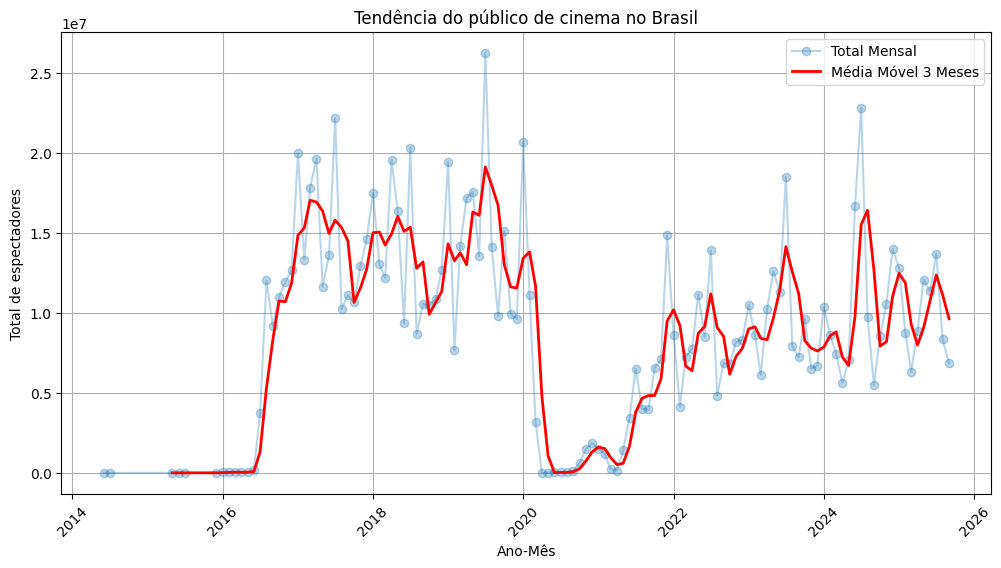

Período analisado: 2014-06 até 2025-09
Mês com maior público: 2019-07 → 26259518 espectadores
Mês com menor público: 2020-04 → 903 espectadores


In [38]:
print("--------------------------------------------------------------------------------------------")
print("Qual a tendência do número de espectadores (PUBLICO) ao longo do tempo? Estamos observando um crescimento, uma queda ou uma estagnação do mercado de cinema no Brasil?")
print("--------------------------------------------------------------------------------------------")

# Garantir que SESSAO está em datetime
df_final['SESSAO'] = pd.to_datetime(df_final['SESSAO'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

# Garantir que PUBLICO é numérico inteiro
df_final['PUBLICO'] = pd.to_numeric(df_final['PUBLICO'], errors='coerce').fillna(0).astype(int)

# Criar coluna Ano-Mês para séries temporais
df_final['ANO_MES'] = df_final['SESSAO'].dt.to_period('M')

# Agregar público por mês
publico_mensal = df_final.groupby('ANO_MES')['PUBLICO'].sum()

# Converter índice para datetime para plotagem
publico_mensal.index = publico_mensal.index.to_timestamp()

# Calcular média móvel de 3 meses para suavizar tendências
publico_mensal_mm = publico_mensal.rolling(window=3).mean()

# ---- Gráfico da série temporal ----
plt.figure(figsize=(12,6))
plt.plot(publico_mensal.index, publico_mensal.values, alpha=0.3, marker='o', linestyle='-', label='Total Mensal')
plt.plot(publico_mensal_mm.index, publico_mensal_mm.values, color='red', linewidth=2, label='Média Móvel 3 Meses')
plt.title("Tendência do público de cinema no Brasil")
plt.xlabel("Ano-Mês")
plt.ylabel("Total de espectadores")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

# ---- Resultados resumidos ----
print("Período analisado: {} até {}".format(publico_mensal.index.min().strftime('%Y-%m'),
                                            publico_mensal.index.max().strftime('%Y-%m')))
print("Mês com maior público:", publico_mensal.idxmax().strftime('%Y-%m'), "→", publico_mensal.max(), "espectadores")
print("Mês com menor público:", publico_mensal.idxmin().strftime('%Y-%m'), "→", publico_mensal.min(), "espectadores")

-   O público responde de forma diferente a filmes nacionais versus estrangeiros?

    -   Qual é a proporção (market share) de PUBLICO para filmes nacionais (PAIS_OBRA = 'Brasil') em comparação com produções estrangeiras?

    -   Essa proporção tem se alterado ao longo do período analisado?

--------------------------------------------------------------------------------------------
Qual a tendência do número de espectadores (PUBLICO) ao longo do tempo? Estamos observando um crescimento, uma queda ou uma estagnação do mercado de cinema no Brasil?
--------------------------------------------------------------------------------------------
Público total por tipo de filme:
 TIPO_FILME
Estrangeiro    980832596
Nacional       112795659
Name: PUBLICO, dtype: int64

Proporção de público (%) por tipo de filme:
 TIPO_FILME
Estrangeiro    89.686106
Nacional       10.313894
Name: PUBLICO, dtype: float64


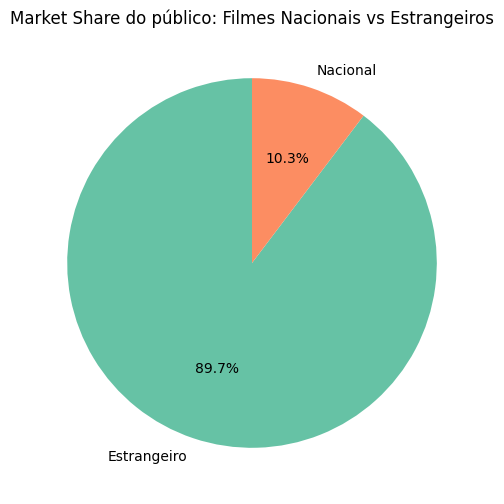

In [42]:
print("--------------------------------------------------------------------------------------------")
print("Qual a tendência do número de espectadores (PUBLICO) ao longo do tempo? Estamos observando um crescimento, uma queda ou uma estagnação do mercado de cinema no Brasil?")
print("--------------------------------------------------------------------------------------------")

# Garantir que PUBLICO é numérico
df_final['PUBLICO'] = pd.to_numeric(df_final['PUBLICO'], errors='coerce').fillna(0).astype(int)

# Criar coluna indicando se é nacional ou estrangeiro
df_final['TIPO_FILME'] = df_final['PAIS_OBRA'].apply(lambda x: 'Nacional' if x == 'BRASIL' else 'Estrangeiro')

# Agregar público por tipo de filme
publico_tipo = df_final.groupby('TIPO_FILME')['PUBLICO'].sum()

# Calcular proporção
proporcao = publico_tipo / publico_tipo.sum() * 100

print("Público total por tipo de filme:\n", publico_tipo)
print("\nProporção de público (%) por tipo de filme:\n", proporcao)

# Gráfico de pizza
plt.figure(figsize=(6,6))
proporcao.plot(kind='pie', autopct='%1.1f%%', colors=['#66c2a5','#fc8d62'], startangle=90)
plt.title("Market Share do público: Filmes Nacionais vs Estrangeiros")
plt.ylabel("")
plt.show()


--------------------------------------------------------------------------------------------
Essa proporção tem se alterado ao longo do período analisado?
--------------------------------------------------------------------------------------------


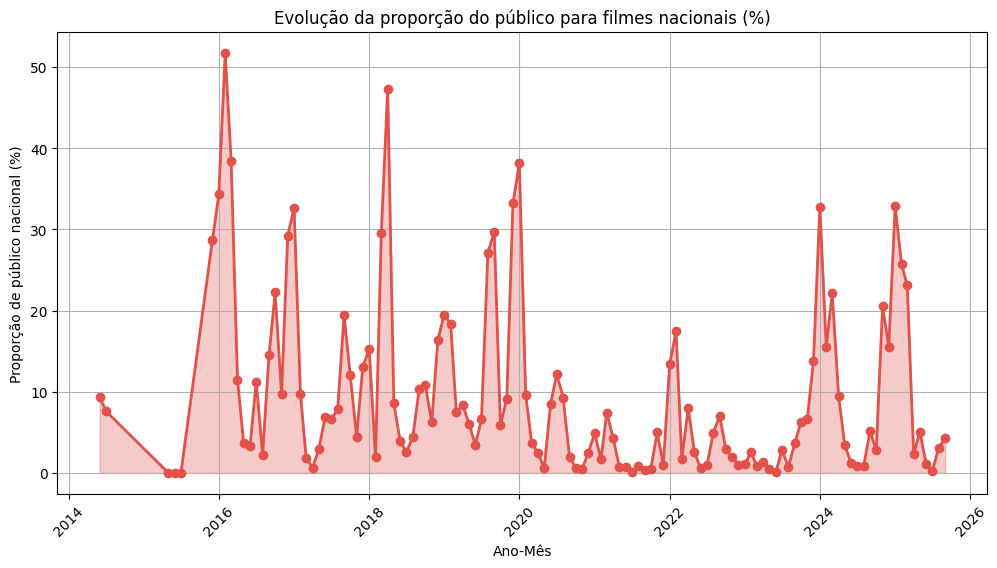

In [43]:
print("--------------------------------------------------------------------------------------------")
print("Essa proporção tem se alterado ao longo do período analisado?")
print("--------------------------------------------------------------------------------------------")

# Criar coluna Ano-Mês
df_final['ANO_MES'] = df_final['SESSAO'].dt.to_period('M')

# Agregar público por tipo de filme e mês
publico_mensal_tipo = df_final.groupby(['ANO_MES', 'TIPO_FILME'])['PUBLICO'].sum().unstack(fill_value=0)

# Calcular proporção de público nacional por mês
publico_mensal_tipo['Proporcao_Nacional'] = publico_mensal_tipo['Nacional'] / (publico_mensal_tipo['Nacional'] + publico_mensal_tipo['Estrangeiro']) * 100

# Converter índice para datetime para plotagem
publico_mensal_tipo.index = publico_mensal_tipo.index.to_timestamp()

# Gráfico da evolução colorido com Spectral
colors = sns.color_palette("Spectral", as_cmap=False)
plt.figure(figsize=(12,6))
plt.plot(publico_mensal_tipo.index, publico_mensal_tipo['Proporcao_Nacional'],
         marker='o', linestyle='-', color=colors[0], markersize=6, linewidth=2)
plt.fill_between(publico_mensal_tipo.index, publico_mensal_tipo['Proporcao_Nacional'],
                 color=colors[0], alpha=0.3)
plt.title("Evolução da proporção do público para filmes nacionais (%)")
plt.xlabel("Ano-Mês")
plt.ylabel("Proporção de público nacional (%)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

2. **Distribuição Geográfica**

-   Como as salas de cinema estão distribuídas pelo território nacional? Quais regiões estão sub-representadas?

    -   Como o PUBLICO total e o número de salas (REGISTRO_SALA) se distribuem entre os diferentes estados (UF_SALA_COMPLEXO)?

    -   A infraestrutura de exibição (número de REGISTRO_COMPLEXO e salas) é concentrada em capitais e grandes centros urbanos?

    -   A análise da distribuição de MUNICIPIO_SALA_COMPLEXO pode revelar quais estados possuem vastas áreas sem acesso a cinemas registrados, ajudando a mapear "desertos culturais"?

In [50]:
# Garantir PUBLICO numérico
df_final['PUBLICO'] = pd.to_numeric(df_final['PUBLICO'], errors='coerce').fillna(0).astype(int)

# Agrupar dados por estado
estados_df = df_final.groupby('UF_SALA_COMPLEXO').agg({
    'REGISTRO_SALA': 'nunique',        # número de salas
    'REGISTRO_COMPLEXO': 'nunique',    # número de complexos
    'PUBLICO': 'sum'                   # público total
}).reset_index().rename(columns={
    'REGISTRO_SALA':'Num_Salas',
    'REGISTRO_COMPLEXO':'Num_Complexos',
    'PUBLICO':'Publico_Total'
})

print(estados_df.head())

/var/folders/nn/lnnz74wx5bn_5k63n278ffc80000gn/T/ipykernel_24123/1905289969.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  estados_df = df_final.groupby('UF_SALA_COMPLEXO').agg({


  UF_SALA_COMPLEXO  Num_Salas  Num_Complexos  Publico_Total
0               AC          6              1        3151382
1               AL         35              8       11268906
2               AM         84             13       22106834
3               AP         15              3        3922068
4               BA        172             50       38966739


In [ ]:
# Shapefile com os estados do Brasil (GeoPandas tem um exemplo)
# Se não tiver, é possível baixar do IBGE ou usar um GeoJSON
brasil = gpd.read_file("brazil-states.geojson")  # arquivo local

# Ajustar coluna para mesclar
brasil = brasil.rename(columns={"sigla":"UF_SALA_COMPLEXO"})

# Mesclar dados de cinemas com o shapefile
mapa_df = brasil.merge(estados_df, on="UF_SALA_COMPLEXO", how="left")

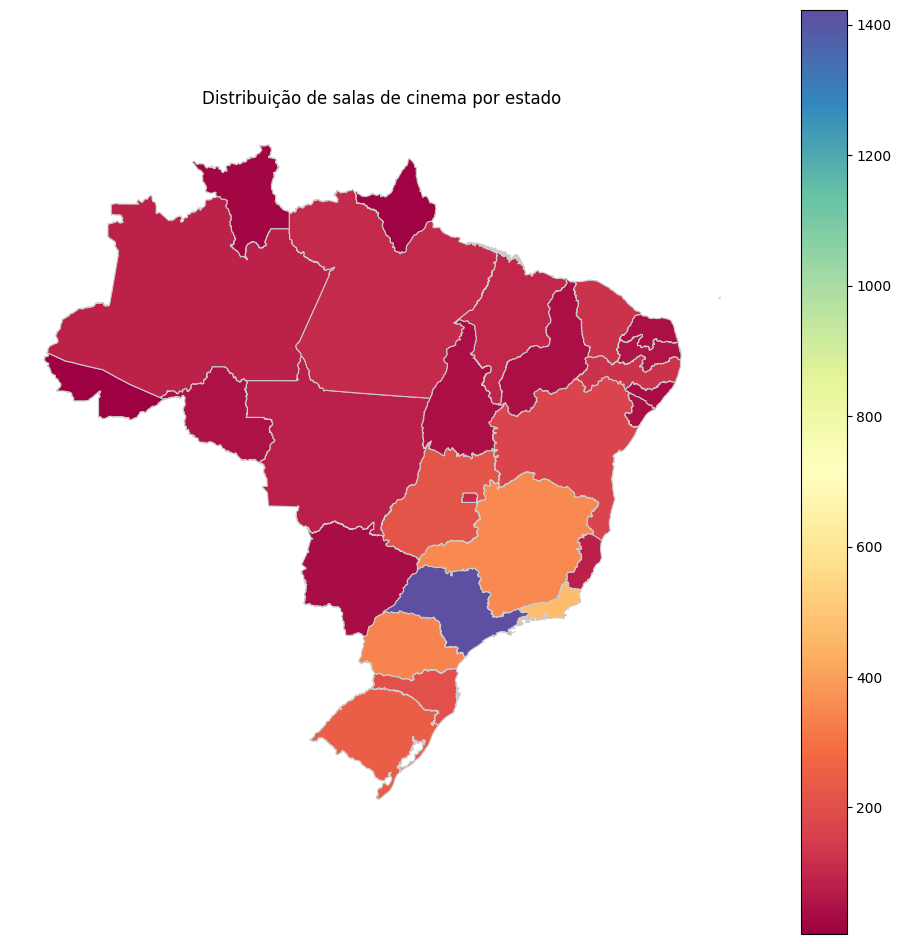

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(12,12))
mapa_df.plot(column='Num_Salas', cmap='Spectral', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title("Distribuição de salas de cinema por estado")
ax.axis('off')
plt.show()

In [65]:
# Criar mapa interativo Plotly
# Agrupar dados por estado
estados_df = df_final.groupby('UF_SALA_COMPLEXO').agg({
    'REGISTRO_SALA': 'nunique',
    'REGISTRO_COMPLEXO': 'nunique',
    'PUBLICO': 'sum'
}).reset_index().rename(columns={
    'REGISTRO_SALA':'Num_Salas',
    'REGISTRO_COMPLEXO':'Num_Complexos',
    'PUBLICO':'Publico_Total'
})

# Carregar GeoJSON local (já pronto, sem alterações)
with open("brazil-states.geojson", "r", encoding="utf-8") as f:
    brasil_geojson = json.load(f)

# Criar mapa interativo Plotly
fig = px.choropleth(
    estados_df,
    geojson=brasil_geojson,
    locations='UF_SALA_COMPLEXO',          # coluna do DataFrame
    featureidkey="properties.sigla",       # coluna do GeoJSON com sigla do estado
    color='Num_Salas',
    hover_name='UF_SALA_COMPLEXO',
    hover_data={
        'Num_Salas':True,
        'Num_Complexos':True,
        'Publico_Total':True
    },
    color_continuous_scale='Spectral',
    labels={'Num_Salas':'Número de Salas'}
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Distribuição de Salas de Cinema por Estado (Brasil)")
fig.show(renderer="browser")


/var/folders/nn/lnnz74wx5bn_5k63n278ffc80000gn/T/ipykernel_24123/1258117865.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [68]:
# Carregar GeoJSON local
with open("brazil-states.geojson", "r", encoding="utf-8") as f:
    brasil_geojson = json.load(f)

# Para colocar bolhas, pegamos coordenadas centrais dos estados
brasil_gdf = gpd.read_file("brazil-states.geojson")
brasil_gdf['centroid'] = brasil_gdf.geometry.centroid
brasil_gdf['lon'] = brasil_gdf.centroid.x
brasil_gdf['lat'] = brasil_gdf.centroid.y

# Mesclar coordenadas centrais com dados
mapa_df = estados_df.merge(brasil_gdf[['sigla','lon','lat']], left_on='UF_SALA_COMPLEXO', right_on='sigla', how='left')

# Criar mapa interativo Plotly com bolhas
fig = px.scatter_mapbox(
    mapa_df,
    lat='lat',
    lon='lon',
    size='Publico_Total',          # tamanho da bolha
    color='Num_Salas',             # cor pelo número de salas
    hover_name='UF_SALA_COMPLEXO',
    hover_data={
        'Num_Salas':True,
        'Num_Complexos':True,
        'Publico_Total':True
    },
    color_continuous_scale='Spectral',
    size_max=50,
    zoom=3,
    mapbox_style="carto-positron"  # mapa base limpo
)

fig.update_layout(title_text="Distribuição de Salas e Público de Cinema no Brasil")
fig.show(renderer="browser")  # abre no navegador

/var/folders/nn/lnnz74wx5bn_5k63n278ffc80000gn/T/ipykernel_24123/4115423233.py:7: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/nn/lnnz74wx5bn_5k63n278ffc80000gn/T/ipykernel_24123/4115423233.py:8: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/nn/lnnz74wx5bn_5k63n278ffc80000gn/T/ipykernel_24123/4115423233.py:9: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/var/folders/nn/lnnz74wx5bn_5k63n278ffc80000gn/T/ipykernel_24123/4115423233.py:15: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.

-   Existe relação entre o número de espectadores e a localização ou tamanho do município?

    -   Quais são os 10 principais municípios em volume de PUBLICO? Eles também são os que possuem mais salas?

    -   A evolução do público ao longo do tempo é uniforme entre as diferentes UFs, ou algumas regiões crescem em ritmo mais acelerado que outras?

    -   Quais são os 10 municípios com maior número de salas de cinema? A infraestrutura de exibição é fortemente concentrada nas capitais e grandes centros urbanos?

In [67]:
# Agrupar público por município
publico_municipio = df_final.groupby(['MUNICIPIO_SALA_COMPLEXO','UF_SALA_COMPLEXO']).agg({
    'PUBLICO':'sum',
    'REGISTRO_SALA':'nunique'
}).reset_index().rename(columns={'REGISTRO_SALA':'Num_Salas'})

# Top 10 municípios por público
top10_municipios = publico_municipio.sort_values(by='PUBLICO', ascending=False).head(10)

print("--------------------------------------------------------------------------------------------")
print("Top 10 municípios em volume de público")
print("--------------------------------------------------------------------------------------------")
print(top10_municipios[['MUNICIPIO_SALA_COMPLEXO','UF_SALA_COMPLEXO','PUBLICO','Num_Salas']])

/var/folders/nn/lnnz74wx5bn_5k63n278ffc80000gn/T/ipykernel_24123/3443898974.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



--------------------------------------------------------------------------------------------
Top 10 municípios em volume de público
--------------------------------------------------------------------------------------------
      MUNICIPIO_SALA_COMPLEXO UF_SALA_COMPLEXO    PUBLICO  Num_Salas
11743               SÃO PAULO               SP  136504840        472
10008          RIO DE JANEIRO               RJ   89356402        262
1734                 BRASÍLIA               DF   33695913        104
1441           BELO HORIZONTE               MG   30327338         88
3554                 CURITIBA               PR   27376922        115
4136                FORTALEZA               CE   26996895         71
10183                SALVADOR               BA   24899660         80
9789                   RECIFE               PE   22165685         52
6995                   MANAUS               AM   21929794         81
2212                 CAMPINAS               SP   20377170         72


In [80]:
# Criar coluna Ano-Mês
df_final['ANO_MES'] = df_final['DATA_EXIBICAO'].dt.to_period('M')
df_final['ANO_MES'] = df_final['ANO_MES'].dt.to_timestamp()

# Agrupar público por UF e mês
publico_uf_tempo = df_final.groupby(['UF_SALA_COMPLEXO','ANO_MES'])['PUBLICO'].sum().reset_index()

# Plot interativo para todos os estados
fig = px.line(
    publico_uf_tempo,
    x='ANO_MES',
    y='PUBLICO',
    color='UF_SALA_COMPLEXO',
    markers=True,
    hover_data={'UF_SALA_COMPLEXO':True, 'PUBLICO':True, 'ANO_MES':True},
    color_discrete_sequence=px.colors.qualitative.Bold  # cores diferenciadas para muitos estados
)

fig.update_layout(
    title="Evolução do público ao longo do tempo por UF (todos os estados)",
    xaxis_title="Ano-Mês",
    yaxis_title="Total de Público",
    legend_title="UF",
    hovermode="x unified"
)

fig.show(renderer="browser")
print(publico_uf_tempo.head(50))

/var/folders/nn/lnnz74wx5bn_5k63n278ffc80000gn/T/ipykernel_24123/3839544725.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



   UF_SALA_COMPLEXO    ANO_MES  PUBLICO
0                AC 2014-06-01        0
1                AC 2014-07-01        0
2                AC 2015-05-01        0
3                AC 2015-06-01        0
4                AC 2015-07-01        0
5                AC 2015-12-01        0
6                AC 2016-01-01        0
7                AC 2016-02-01        0
8                AC 2016-03-01        0
9                AC 2016-04-01        0
10               AC 2016-05-01        0
11               AC 2016-06-01     4446
12               AC 2016-07-01    49275
13               AC 2016-08-01    33578
14               AC 2016-09-01    25584
15               AC 2016-10-01    28270
16               AC 2016-11-01    32335
17               AC 2016-12-01    45016
18               AC 2017-01-01    59384
19               AC 2017-02-01    41641
20               AC 2017-03-01    45196
21               AC 2017-04-01    53804
22               AC 2017-05-01    30500
23               AC 2017-06-01    39988


3. **Perfil dos Filmes e Sessões**
-   Quais gêneros ou tipos de filmes atraem mais público?

    -   Quais foram os 20 filmes (TITULO_BRASIL) de maior PUBLICO no período? Qual a nacionalidade (PAIS_OBRA) predominante nessa lista?

    -    O público médio por sessão de filmes brasileiros é comparável ao de filmes estrangeiros (em especial, os norte-americanos)?

In [82]:
# Agrupar público por filme
publico_filmes = df_final.groupby(['TITULO_BRASIL','PAIS_OBRA']).agg({'PUBLICO':'sum'}).reset_index()

# Top 20 filmes por público
top20_filmes = publico_filmes.sort_values(by='PUBLICO', ascending=False).head(20)

print("--------------------------------------------------------------------------------------------")
print("Top 20 filmes de maior público")
print("--------------------------------------------------------------------------------------------")
print(top20_filmes)

/var/folders/nn/lnnz74wx5bn_5k63n278ffc80000gn/T/ipykernel_24123/205333338.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



--------------------------------------------------------------------------------------------
Top 20 filmes de maior público
--------------------------------------------------------------------------------------------
                                   TITULO_BRASIL       PAIS_OBRA   PUBLICO
134004                         DIVERTIDA MENTE 2  ESTADOS UNIDOS  22184898
418719                      VINGADORES: ULTIMATO  ESTADOS UNIDOS  19361828
185682         HOMEM-ARANHA: SEM VOLTA PARA CASA  ESTADOS UNIDOS  16643009
295113                                O REI LEÃO  ESTADOS UNIDOS  16055534
418638               VINGADORES: GUERRA INFINITA  ESTADOS UNIDOS  14286806
73254                  AVATAR: O CAMINHO DA ÁGUA  ESTADOS UNIDOS  11563525
251189                             NADA A PERDER          BRASIL  11418455
239120                    MINHA MÃE É UMA PEÇA 3          BRASIL  11376931
78195                                     BARBIE  ESTADOS UNIDOS  10694490
211764                           

In [85]:
# Garantir PUBLICO numérico
df_final['PUBLICO'] = pd.to_numeric(df_final['PUBLICO'], errors='coerce').fillna(0).astype(int)

# Criar coluna de nacionalidade simplificada
def nacionalidade_cat(pais):
    if pais == 'BRASIL':
        return 'BRASIL'
    elif pais == 'ESTADOS UNIDOS':
        return 'EUA'
    else:
        return 'Outros'

df_final['NACIONALIDADE'] = df_final['PAIS_OBRA'].apply(nacionalidade_cat)

# Agrupar público médio por nacionalidade
publico_medio_nacionalidade = df_final.groupby('NACIONALIDADE')['PUBLICO'].mean().reset_index()

print("--------------------------------------------------------------------------------------------")
print("Público médio por sessão por nacionalidade")
print("--------------------------------------------------------------------------------------------")
print(publico_medio_nacionalidade)

--------------------------------------------------------------------------------------------
Público médio por sessão por nacionalidade
--------------------------------------------------------------------------------------------
  NACIONALIDADE    PUBLICO
0        BRASIL  26.245221
1           EUA  35.026023
2        Outros  24.798892


-   Filmes legendados ou dublados têm desempenho diferente em diferentes regiões?

    -   Filmes com AUDIO original e LEGENDADA atraem mais público do que os dublados?

    -   Essa preferência de formato (dublado vs. legendado) é a mesma em todas as UF_SALA_COMPLEXO?

In [86]:
# Garantir PUBLICO numérico
df_final['PUBLICO'] = pd.to_numeric(df_final['PUBLICO'], errors='coerce').fillna(0).astype(int)

# Agrupar público médio por tipo de exibição
publico_audio = df_final.groupby('AUDIO')['PUBLICO'].mean().reset_index().sort_values(by='PUBLICO', ascending=False)

print("--------------------------------------------------------------------------------------------")
print("Público médio por tipo de áudio")
print("--------------------------------------------------------------------------------------------")
print(publico_audio)


/var/folders/nn/lnnz74wx5bn_5k63n278ffc80000gn/T/ipykernel_24123/1747687558.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



--------------------------------------------------------------------------------------------
Público médio por tipo de áudio
--------------------------------------------------------------------------------------------
      AUDIO    PUBLICO
0   DUBLADO  34.074300
1  ORIGINAL  29.318993


In [87]:
# Agrupar público médio por estado e tipo de áudio
publico_audio_uf = df_final.groupby(['UF_SALA_COMPLEXO','AUDIO'])['PUBLICO'].mean().reset_index()

print("--------------------------------------------------------------------------------------------")
print("Público médio por tipo de áudio por UF")
print("--------------------------------------------------------------------------------------------")
print(publico_audio_uf.head(20))

/var/folders/nn/lnnz74wx5bn_5k63n278ffc80000gn/T/ipykernel_24123/2524317115.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



--------------------------------------------------------------------------------------------
Público médio por tipo de áudio por UF
--------------------------------------------------------------------------------------------
   UF_SALA_COMPLEXO     AUDIO    PUBLICO
0                AC   DUBLADO  51.504093
1                AC  ORIGINAL  28.954095
2                AL   DUBLADO  39.119660
3                AL  ORIGINAL  30.122901
4                AM   DUBLADO  36.624546
5                AM  ORIGINAL  25.621373
6                AP   DUBLADO  30.278122
7                AP  ORIGINAL  21.346325
8                BA   DUBLADO  34.848230
9                BA  ORIGINAL  28.910650
10               CE   DUBLADO  35.018778
11               CE  ORIGINAL  33.810529
12               DF   DUBLADO  42.092601
13               DF  ORIGINAL  31.889844
14               ES   DUBLADO  29.204208
15               ES  ORIGINAL  26.802468
16               GO   DUBLADO  27.424735
17               GO  ORIGINAL  30.129

4. **Desempenho das Exibidoras**
-   Quantas exibidoras e complexos estão ativos em cada região? Há concentração de mercado em determinadas empresas?

    -   Quais são os maiores grupos exibidores (RAZAO_SOCIAL_EXIBIDORA) em termos de PUBLICO total e número de salas?

    -   Quantas empresas exibidoras distintas (CNPJ_EXIBIDORA) estão ativas no dataset e como se distribuem geograficamente?

In [88]:
# Agrupar por UF
uf_exibidoras = df_final.groupby('UF_SALA_COMPLEXO').agg({
    'REGISTRO_COMPLEXO':'nunique',
    'REGISTRO_SALA':'nunique'
}).reset_index().rename(columns={
    'REGISTRO_COMPLEXO':'Num_Complexos',
    'REGISTRO_SALA':'Num_Salas'
})

print("--------------------------------------------------------------------------------------------")
print("Número de complexos e salas por UF")
print("--------------------------------------------------------------------------------------------")
print(uf_exibidoras.sort_values(by='Num_Salas', ascending=False))

/var/folders/nn/lnnz74wx5bn_5k63n278ffc80000gn/T/ipykernel_24123/1491745785.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



--------------------------------------------------------------------------------------------
Número de complexos e salas por UF
--------------------------------------------------------------------------------------------
   UF_SALA_COMPLEXO  Num_Complexos  Num_Salas
25               SP            339       1423
18               RJ            117        474
10               MG            116        350
17               PR             97        341
22               RS             76        249
8                GO             58        217
23               SC             62        202
4                BA             50        172
5                CE             32        127
15               PE             23        123
6                DF             18        104
13               PA             27        103
9                MA             24         96
2                AM             13         84
12               MT             21         82
7                ES             23         

In [89]:
# Agrupar por grupo exibidor
grupos_exibidores = df_final.groupby('RAZAO_SOCIAL_EXIBIDORA').agg({
    'PUBLICO':'sum',
    'REGISTRO_SALA':'nunique'
}).reset_index().rename(columns={'REGISTRO_SALA':'Num_Salas','PUBLICO':'Publico_Total'})

# Top 10 grupos
top10_grupos = grupos_exibidores.sort_values(by='Publico_Total', ascending=False).head(10)

print("--------------------------------------------------------------------------------------------")
print("Top 10 maiores grupos exibidores por público total")
print("--------------------------------------------------------------------------------------------")
print(top10_grupos)

/var/folders/nn/lnnz74wx5bn_5k63n278ffc80000gn/T/ipykernel_24123/3074235364.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



--------------------------------------------------------------------------------------------
Top 10 maiores grupos exibidores por público total
--------------------------------------------------------------------------------------------
                                RAZAO_SOCIAL_EXIBIDORA  Publico_Total  \
136                                CINEMARK BRASIL S.A      259961650   
191      CINEPOLIS OPERADORA DE CINEMAS DO BRASIL LTDA      140359362   
225                       EMPRESA CINEMAS SÃO LUIZ S/A       74439189   
348                   MSA EMPRESA CINEMATOGRÁFICA LTDA       67212738   
444          UNITED CINEMAS INTERNATIONAL BRASIL LTDA.       53193753   
440                                   UCI RIBEIRO LTDA       32569524   
385                  REDECINE BRA CINEMATOGRÁFICA S.A.       28931880   
216                                  DELTA FILMES LTDA       25197706   
372  PRAIA DE BELAS EMPREENDIMENTOS CINEMATOGRÁFICO...       21113377   
337                              

In [90]:
# Número total de empresas distintas
num_empresas = df_final['CNPJ_EXIBIDORA'].nunique()
print("--------------------------------------------------------------------------------------------")
print(f"Número total de empresas exibidoras distintas: {num_empresas}")
print("--------------------------------------------------------------------------------------------")

# Distribuição por UF
empresas_uf = df_final.groupby('UF_SALA_COMPLEXO')['CNPJ_EXIBIDORA'].nunique().reset_index().rename(columns={'CNPJ_EXIBIDORA':'Num_Empresas'})
print("Distribuição de empresas exibidoras por UF")
print(empresas_uf.sort_values(by='Num_Empresas', ascending=False))

--------------------------------------------------------------------------------------------
Número total de empresas exibidoras distintas: 460
--------------------------------------------------------------------------------------------


/var/folders/nn/lnnz74wx5bn_5k63n278ffc80000gn/T/ipykernel_24123/1211010548.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Distribuição de empresas exibidoras por UF
   UF_SALA_COMPLEXO  Num_Empresas
25               SP           125
10               MG            74
17               PR            58
18               RJ            52
22               RS            46
4                BA            31
8                GO            30
23               SC            27
9                MA            22
7                ES            20
12               MT            18
5                CE            17
13               PA            16
15               PE            15
6                DF            14
14               PB            12
24               SE            10
2                AM            10
20               RO             9
26               TO             9
1                AL             7
11               MS             7
19               RN             6
16               PI             6
21               RR             4
3                AP             3
0                AC             1


-   Existe correlação entre tamanho do complexo, número de salas e público atendido?

    -   Os grandes grupos exibidores dão o mesmo espaço para filmes nacionais que os exibidores menores e independentes?

    -   A presença de grandes exibidoras varia por UF_SALA_COMPLEXO? Existem estados dominados por players específicos?

    -   Grandes redes de cinema (REGISTRO_GRUPO_EXIBIDOR) têm um comportamento de exibição (ex: proporção de filmes nacionais) diferente de exibidores menores ou independentes?

    -   A presença de grandes exibidoras varia geograficamente? Existem estados ou regiões dominados por empresas específicas?

    -   Quantas empresas exibidoras (CNPJ_EXIBIDORA) distintas estão ativas no dataset? Há uma variação significativa no número de exibidoras ativas ao longo do tempo?

In [91]:
# Agrupar por complexo
complexos = df_final.groupby('REGISTRO_COMPLEXO').agg({
    'REGISTRO_SALA':'nunique',
    'PUBLICO':'sum'
}).reset_index().rename(columns={'REGISTRO_SALA':'Num_Salas','PUBLICO':'Publico_Total'})

# Calcular correlação
correlacao = complexos[['Num_Salas','Publico_Total']].corr()
print("--------------------------------------------------------------------------------------------")
print("Correlação entre número de salas e público total por complexo")
print("--------------------------------------------------------------------------------------------")
print(correlacao)

--------------------------------------------------------------------------------------------
Correlação entre número de salas e público total por complexo
--------------------------------------------------------------------------------------------
               Num_Salas  Publico_Total
Num_Salas        1.00000        0.80045
Publico_Total    0.80045        1.00000


In [96]:
# Garantir PUBLICO numérico
df_final['PUBLICO'] = pd.to_numeric(df_final['PUBLICO'], errors='coerce').fillna(0).astype(int)

# Definir grandes exibidores (top 10 por público total)
top_grandes = df_final.groupby('RAZAO_SOCIAL_EXIBIDORA')['PUBLICO'].sum().nlargest(10).index.tolist()

# Criar coluna Tipo_Exibidor
df_final['Tipo_Exibidor'] = df_final['RAZAO_SOCIAL_EXIBIDORA'].apply(lambda x: 'Grande' if x in top_grandes else 'Pequeno/Independente')

# Agrupar público médio por tipo de exibidor e nacionalidade
publico_nacionalidade = df_final.groupby(['Tipo_Exibidor','PAIS_OBRA'])['PUBLICO'].mean().reset_index()

print("--------------------------------------------------------------------------------------------")
print("Público médio por sessão por tipo de exibidor e nacionalidade")
print("--------------------------------------------------------------------------------------------")
print(publico_nacionalidade.head(60))

/var/folders/nn/lnnz74wx5bn_5k63n278ffc80000gn/T/ipykernel_24123/48531944.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/nn/lnnz74wx5bn_5k63n278ffc80000gn/T/ipykernel_24123/48531944.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



--------------------------------------------------------------------------------------------
Público médio por sessão por tipo de exibidor e nacionalidade
--------------------------------------------------------------------------------------------
   Tipo_Exibidor                        PAIS_OBRA    PUBLICO
0         Grande                      AFEGANISTÃO        NaN
1         Grande                         ALEMANHA  13.918733
2         Grande                        ARGENTINA  22.202122
3         Grande                          ARGÉLIA   7.674419
4         Grande                   ARÁBIA SAUDITA   8.259259
5         Grande                        AUSTRÁLIA  20.958115
6         Grande            BELARUS (BIELORUSSIA)  16.215708
7         Grande                          BOLÍVIA        NaN
8         Grande                           BRASIL  29.451454
9         Grande                         BULGÁRIA        NaN
10        Grande                            BUTÃO   4.688889
11        Grande    

In [97]:
# Contar número de complexos por grande exibidor em cada UF
concentracao_uf = df_final[df_final['RAZAO_SOCIAL_EXIBIDORA'].isin(top_grandes)].groupby(['UF_SALA_COMPLEXO','RAZAO_SOCIAL_EXIBIDORA'])['REGISTRO_COMPLEXO'].nunique().reset_index().rename(columns={'REGISTRO_COMPLEXO':'Num_Complexos'})

print("--------------------------------------------------------------------------------------------")
print("Distribuição de grandes exibidoras por UF")
print("--------------------------------------------------------------------------------------------")
print(concentracao_uf.sort_values(by=['UF_SALA_COMPLEXO','Num_Complexos'], ascending=[True,False]))

/var/folders/nn/lnnz74wx5bn_5k63n278ffc80000gn/T/ipykernel_24123/2472448729.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



--------------------------------------------------------------------------------------------
Distribuição de grandes exibidoras por UF
--------------------------------------------------------------------------------------------
      UF_SALA_COMPLEXO                             RAZAO_SOCIAL_EXIBIDORA  \
0                   AC  ACAMLS - ASSOCIAÇÃO CULTURAL DE AMIGOS DO MUSE...   
1                   AC             ADICINE ADMINISTRADORA DE CINEMAS LTDA   
2                   AC                                   ADRIANA MOSER ME   
3                   AC                         ADRIANO RICARDO LEITE - ME   
4                   AC                        AFA CINEMATOGRÁFICA LTDA ME   
...                ...                                                ...   
12388               TO             WELLINGTON CARDOSO DA LUZ CINEMAS LTDA   
12389               TO                                     WEST CINE LTDA   
12390               TO                     WEST SIDE SHOPPING CENTER LTDA   
12

In [100]:
# Garantir PUBLICO numérico
df_final['PUBLICO'] = pd.to_numeric(df_final['PUBLICO'], errors='coerce').fillna(0).astype(int)

# Definir grandes grupos por público total (top 10)
top_grupos = df_final.groupby('REGISTRO_GRUPO_EXIBIDOR')['PUBLICO'].sum().nlargest(10).index.tolist()

# Criar coluna Tipo_Grupo
df_final['Tipo_Grupo'] = df_final['REGISTRO_GRUPO_EXIBIDOR'].apply(lambda x: 'Grande' if x in top_grupos else 'Pequeno/Independente')

# Agrupar total de sessões por tipo de grupo e nacionalidade
sessao_nacionalidade = df_final.groupby(['Tipo_Grupo','PAIS_OBRA'])['REGISTRO_SALA'].count().reset_index().rename(columns={'REGISTRO_SALA':'Num_Sessoes'})

# Calcular proporção de sessões nacionais
total_sessoes = sessao_nacionalidade.groupby('Tipo_Grupo')['Num_Sessoes'].sum().reset_index().rename(columns={'Num_Sessoes':'Total_Sessoes'})
sessao_nacionalidade = sessao_nacionalidade.merge(total_sessoes, on='Tipo_Grupo')
sessao_nacionalidade['Proporcao_Nacional'] = sessao_nacionalidade.apply(lambda row: row['Num_Sessoes']/row['Total_Sessoes'] if row['PAIS_OBRA']=='BRASIL' else 0, axis=1)

# Filtrar apenas a proporção de filmes nacionais
proporcao_nacional = sessao_nacionalidade[sessao_nacionalidade['PAIS_OBRA']=='BRASIL'][['Tipo_Grupo','Proporcao_Nacional']]

print("--------------------------------------------------------------------------------------------")
print("Proporção de filmes nacionais por tipo de grupo exibidor")
print("--------------------------------------------------------------------------------------------")
print(proporcao_nacional)

/var/folders/nn/lnnz74wx5bn_5k63n278ffc80000gn/T/ipykernel_24123/3462067.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



--------------------------------------------------------------------------------------------
Proporção de filmes nacionais por tipo de grupo exibidor
--------------------------------------------------------------------------------------------
              Tipo_Grupo  Proporcao_Nacional
8                 Grande            0.132717
89  Pequeno/Independente            0.118898


In [102]:
# Número total de empresas distintas
num_empresas = df_final['CNPJ_EXIBIDORA'].nunique()
print("--------------------------------------------------------------------------------------------")
print(f"Número total de empresas exibidoras distintas no dataset: {num_empresas}")
print("--------------------------------------------------------------------------------------------")

# Criar coluna de ano
df_final['ANO_EXIBICAO'] = pd.to_datetime(df_final['DATA_EXIBICAO'], errors='coerce').dt.year

# Número de empresas ativas por ano
empresas_ano = df_final.groupby('ANO_EXIBICAO')['CNPJ_EXIBIDORA'].nunique().reset_index().rename(columns={'CNPJ_EXIBIDORA':'Num_Empresas_Ativas'})

print("--------------------------------------------------------------------------------------------")
print("Número de empresas exibidoras ativas por ano")
print("--------------------------------------------------------------------------------------------")
print(empresas_ano)



--------------------------------------------------------------------------------------------
Número total de empresas exibidoras distintas no dataset: 460
--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
Número de empresas exibidoras ativas por ano
--------------------------------------------------------------------------------------------
    ANO_EXIBICAO  Num_Empresas_Ativas
0           2014                    1
1           2015                    1
2           2016                  205
3           2017                  303
4           2018                  317
5           2019                  324
6           2020                  312
7           2021                  288
8           2022                  312
9           2023                  315
10          2024                  328
11          2025                  326


# Cronograma

| Etapa                         | Atividade                                                      | Data de Entrega   |
|-------------------------------|----------------------------------------------------------------|------------------|
| Etapa 1                       | Coleta e organização dos dados (ANCINE)                        | Semana 1         |
| Etapa 2                       | Pré-processamento e limpeza de dados                           | Semana 2         |
| Etapa 3                       | Análise exploratória (EDA) e estatísticas descritivas           | Semana 3         |
| Etapa 4                       | Modelagem de séries temporais (ARIMA, SARIMA, LSTM)            | Semana 4-5       |
| Etapa 5                       | Avaliação de modelos e ajustes finais                          | Semana 6         |
| Etapa 6                       | Elaboração de relatório e preparação da apresentação           | Semana 7         |


# Referências

- ONU. Transformando nosso mundo: a Agenda 2030 para o Desenvolvimento Sustentável. Disponível em: https://sc.movimentoods.org.br/agenda-2030/. Acesso em: 28 ago. 2025.  
- INSTITUTO BRASILEIRO DE GEOGRAFIA E ESTATÍSTICA (IBGE). País tem quase 40% da população em municípios sem salas de cinema. Agência de Notícias IBGE, 2020. Disponível em: https://agenciadenoticias.ibge.gov.br/agencia-noticias/2012-agencia-de-noticias/noticias/26239-pais-tem-quase-40-da-populacao-em-municipios-sem-salas-de-cinema. Acesso em: 28 ago. 2025.  
- INSTITUTO DE CINEMA. Democratização do acesso ao cinema no Brasil: Enem traz tema extremamente pertinente para a redação 2019. Instituto de Cinema, 2019. Disponível em: https://institutodecinema.com.br/mais/conteudo/democratizacao-do-acesso-ao-cinema-no-brasil-enem-traz-tema-extremamente-pertinente-para-a-redacao-2019. Acesso em: 28 ago. 2025.  
- AGÊNCIA NACIONAL DO CINEMA – ANCINE; PORTAL BRASILEIRO DE DADOS ABERTOS. Relatório de bilheteria diária de obras informadas pelas exibidoras. Disponível em: https://dados.gov.br/dados/conjuntos-dados/relatorio-de-bilheteria-diaria-de-obras-informadas-pelas-exibidoras. Acesso em: 28 ago. 2025.  


In [ ]:
#@title **Avaliação**
Referencial_teorico = 10 #@param {type:"slider", min:0, max:10, step:1}

Pipeline_solucao = 10 #@param {type:"slider", min:0, max:10, step:1}

Cronograma = 10 #@param {type:"slider", min:0, max:10, step:1}

In [ ]:
#@title **Nota Final**
nota = 0.45*Referencial_teorico + 0.45*Pipeline_solucao + 0.10*Cronograma

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_nome.append(lista[0]);")

alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 10.0



,nome,nota
0,Aluno 1,10.0
1,Aluno 2,10.0
2,Aluno 3,10.0
3,Aluno 4,10.0
4,Aluno 5,10.0
